In [1]:
#start with laoding all necessary libraries
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt



In [2]:
#load in the dataframe
df = pd.read_csv("C:\\Users\\chaitanya_patil\\Downloads\\wine-reviews\\winemag-data_first150k.csv",index_col=0)

In [3]:
#looking ar first 5 rows of the dataset
df.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [4]:
print("There are {} observation and {} features in this dataset. \n".format(df.shape[0],df.shape[1]))
print("There are {} types of wine in this datasets such as {}...\n".format(len(df.variety.unique()),", ".join(df.variety.unique()[0:5])))
#unique() --- this function will get all the unique values from the column
#Unique values are the items that appear in a dataset only once. 
print("There are {} countries producing wine in this dataset such as {}... \n".format(len(df.country.unique()),", ".join(df.country.unique()[0:5])))

There are 150930 observation and 10 features in this dataset. 

There are 632 types of wine in this datasets such as Cabernet Sauvignon, Tinta de Toro, Sauvignon Blanc, Pinot Noir, Provence red blend...

There are 49 countries producing wine in this dataset such as US, Spain, France, Italy, New Zealand... 



In [5]:
df[["country","description","points"]].head()

,country,description,points
0,US,This tremendous 100% varietal wine hails from ...,96
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",96
2,US,Mac Watson honors the memory of a wine once ma...,96
3,US,"This spent 20 months in 30% new French oak, an...",96
4,France,"This is the top wine from La Bégude, named aft...",95


To make comparisons between groups of a feature, you can use groupby() and compute summary statistics.

With the wine dataset, you can group by country and look at either the summary statistics for all countries' points and price or select the most popular and expensive ones.

In [6]:
#Groupby by country
country = df.groupby("country")

#Summary statistics of all countries

country.describe().head()

points                                                \
                         count       mean       std   min   25%   50%    75%   
country                                                                        
Albania                    2.0  88.000000  0.000000  88.0  88.0  88.0  88.00   
Argentina               5631.0  85.996093  3.095287  80.0  84.0  86.0  88.00   
Australia               4957.0  87.892475  2.977779  80.0  86.0  88.0  90.00   
Austria                 3057.0  89.276742  2.557063  81.0  88.0  89.0  91.00   
Bosnia and Herzegovina     4.0  84.750000  2.362908  83.0  83.0  84.0  85.75   

                                price                                     \
                          max   count       mean        std   min    25%   
country                                                                    
Albania                  88.0     2.0  20.000000   0.000000  20.0  20.00   
Argentina                97.0  5587.0  20.794881  20.186540   4.0  11.00   
Australia               100.0  4894.0  31.258480  39.008512   5.0  15.00   
Austria                  98.0  2483.0  31.192106  28.540861   8.0  18.00   
Bosnia and Herzegovina   88.0     4.0  12.750000   0.500000  12.0  12.75   

                                            
                         50%   75%     max  
country                                     
Albania                 20.0  20.0    20.0  
Argentina               15.0  20.0   250.0  
Australia               20.0  34.0   850.0  
Austria                 25.0  38.0  1100.0  
Bosnia and Herzegovina  13.0  13.0    13.0

This selects the top 5 highest average points.

In [7]:
country.mean().sort_values(by="points",ascending=False).head()

,points,price
country,,
England,92.888889,47.500000
Austria,89.276742,31.192106
France,88.925870,45.619885
Germany,88.626427,39.011078
Italy,88.413664,37.547913


We can plot the number of wines by country using the plot method of pandas Dataframe and matplotlib.

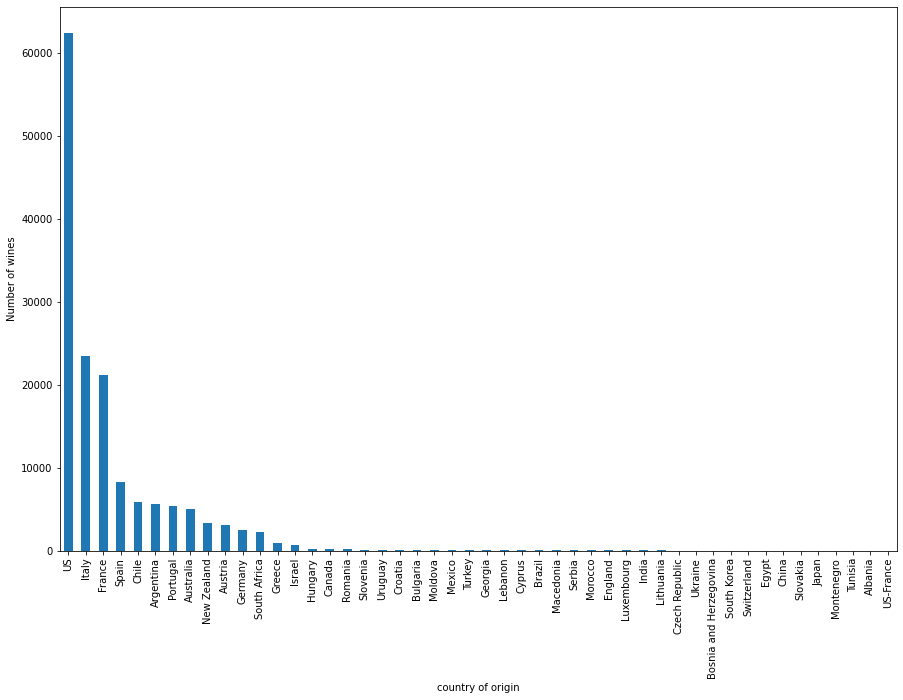

In [8]:
plt.figure(figsize=(15,10))
country.size().sort_values(ascending=False).plot.bar()

plt.xlabel("country of origin")
plt.ylabel("Number of wines")
plt.show()

In [9]:
country.size()

country
Albania                       2
Argentina                  5631
Australia                  4957
Austria                    3057
Bosnia and Herzegovina        4
Brazil                       25
Bulgaria                     77
Canada                      196
Chile                      5816
China                         3
Croatia                      89
Cyprus                       31
Czech Republic                6
Egypt                         3
England                       9
France                    21098
Georgia                      43
Germany                    2452
Greece                      884
Hungary                     231
India                         8
Israel                      630
Italy                     23478
Japan                         2
Lebanon                      37
Lithuania                     8
Luxembourg                    9
Macedonia                    16
Mexico                       63
Moldova                      71
Montenegro                    2


Does quantity over quality?

Let's now take a look at the plot of all 44 countries by its highest rated wine

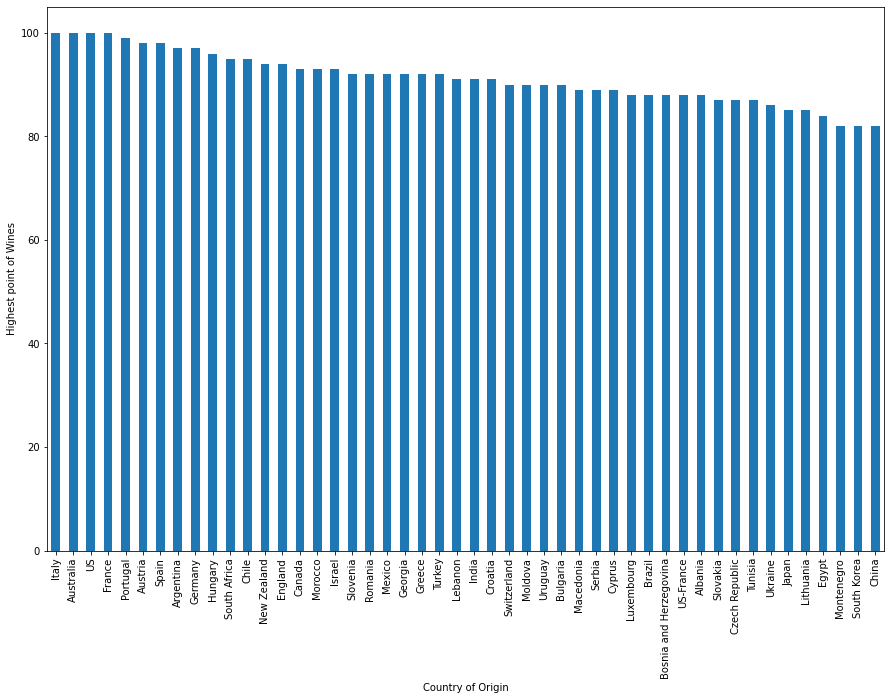

In [10]:
plt.figure(figsize=(15,10))
country.max().sort_values(by="points",ascending=False)["points"].plot.bar()

plt.xlabel("Country of Origin")
plt.ylabel("Highest point of Wines")
plt.show()

Australia, US, Portugal, Italy, and France all have 100 points wine. If you notice, Portugal ranks 5th and Australia ranks 9th in the number of wines produces in the dataset, and both countries have less than 8000 types of wine.

That's a little bit of data exploration to get to know the dataset that you are using today.

In [11]:
df.description[0]

'This tremendous 100% varietal wine hails from Oakville and was aged over three years in oak. Juicy red-cherry fruit and a compelling hint of caramel greet the palate, framed by elegant, fine tannins and a subtle minty tone in the background. Balanced and rewarding from start to finish, it has years ahead of it to develop further nuance. Enjoy 2022–2030.'

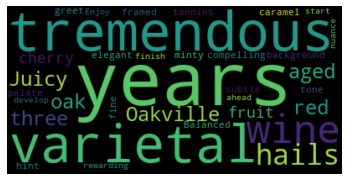

In [12]:
# start with one review
text = df.description[0]

#Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Now, change some optional arguments of the WordCloud like max_font_size, max_word, and background_color .

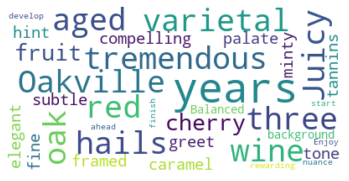

In [13]:
# lower max_font_size, change the maximum number word and lighten the background

wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)


plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [14]:
# Save the image in the img folder:

wordcloud.to_file("C:/Users/chaitanya_patil/Desktop/nltk_folder/first_review.png")

So now you'll combine all wine reviews into one big text and create a big fat cloud to see which characteristics are most common in these wines.

In [15]:
text = " ".join(review for review in df.description)
print( "There are {} words in the combination of all review.".format(len(text)))



There are 36430569 words in the combination of all review.


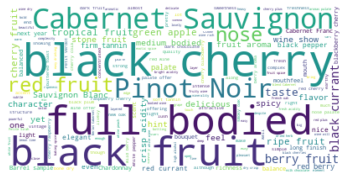

In [17]:
# Create stopword list
stopwords = set(STOPWORDS)
stopwords.update(["drink","now","flower","flavors"])


#Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

#Display the generated image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Ohhh, it seems like black cherry and full-bodied are the most mentioned characteristics, and Cabernet Sauvignon is the most popular of them all. This aligns with the fact that Cabernet Sauvignon "is one of the world's most widely recognized red wine grape varieties. It is grown in nearly every major wine producing country among a diverse spectrum of climates from Canada's Okanagan Valley to Lebanon's Beqaa Valley".

In [20]:
wine_mask = np.array(Image.open("C:/Users/chaitanya_patil/Desktop/nltk_folder/wine_mask_xgk1tq.png"))
wine_mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

The way the masking functions works is that it requires all white part of the mask should be 255 not 0(integer type). 
This value represents the "intensity" of the pixel. Values of 255 are pure white, whereas values of 1 are black. Here , you can use the provided function below to transform your mask if your mask has the same format as above.
Notice if you have a mask that the background is not 0, but 1 or 2, adjust the function to match your mask.

transform_format()

In [21]:
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

Then, create a new mask with the same shape as the mask you have in hand and apply the function transform_format() to each value in each row of the previous mask.

In [22]:
# Transform your mask into a new one that will work with the funtion

transformed_wine_mask = np.ndarray((wine_mask.shape[0],wine_mask.shape[1]), np.int32)

for i in range(len(wine_mask)):
    transformed_wine_mask[i] = list(map(transform_format, wine_mask[i]))
    

Now, you have a new mask in the correct form. Printout the transformed mask is the best way to check if the function works fine.

In [23]:
# check the expected result of your mask
transformed_wine_mask

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]])

Okay! With the right mask, you can start making the wordcloud with your selected shape. Notice in the WordCloud function, there is a mask argument that takes in the transformed mask that you created above. The contour_width and contour_color are, as their name, arguments to adjust the outline characteristics of the cloud. The wine bottle you have here is a red wine bottle, so firebrick seems like a good choice for contour color. For more choice of color, you can take a look at this color code table

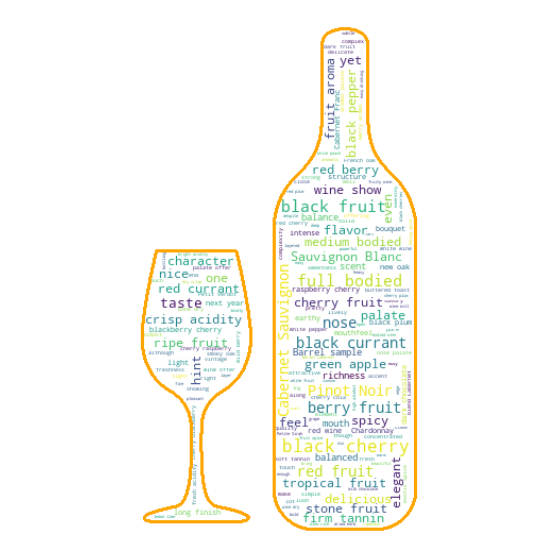

In [38]:
# create a word cloud image
wc = WordCloud(background_color="white", max_words=1000, mask=transformed_wine_mask,stopwords=stopwords, contour_width=3, contour_color='orange')

# Generate a wordcloud
wc.generate(text)

# store to file
wc.to_file("C:/Users/chaitanya_patil/Desktop/nltk_folder/wine.png")

#show
plt.figure(figsize=[20,10])
plt.imshow(wc,interpolation='bilinear')
plt.axis("off")
plt.show()